# Initialize

## Initialization

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from timeit import default_timer as timer
from jupyterthemes import jtplot
jtplot.reset()

fig_dir = "figures/"
paper_fig_dir = "C:\\Users\\rtorre\\Dropbox\\Work\\04_Projects\\Git\\GitHub\\NormalizingFlows\\NormalizingFlows\\papers\\NFHD\\figures\\" 

## Useful functions

In [5]:
def build_data_from_runs(path,save_file_name,results="succeeded"):
    print("Processing path", path,"for",results,"runs.")
    runs_list=[[int(i.replace("run_","")),os.path.abspath(os.path.join(os.path.join(path,i),"results.txt"))] for i in os.listdir(path) if ("run" in i and os.path.isdir(os.path.abspath(os.path.join(path,i))))]
    runs_list.sort()
    if os.path.exists(runs_list[0][1]):
        data=pd.read_csv(runs_list[0][1])
        i=1
        j=0
    else:
        print("No results available for run",runs_list[0][1])
        data=pd.DataFrame()
        i=0
        j=0
    for run in runs_list[1:]:
        if os.path.exists(run[1]):
            tmp = pd.read_csv(run[1]).pop("time")
            if 'nan' in str(tmp) or "failed" in str(tmp):
                if results == "all":
                    data=pd.concat([data,pd.read_csv(run[1])])
                else:
                    pass
            else:
                data=pd.concat([data,pd.read_csv(run[1])])
            i=i+1
        else:
            j=j+1
            print("No results available for run",run[0])
    data = data.reset_index(drop=True).replace("failed","nan")
    print("Succesfully imported", i, "runs (failed to import",j,"runs).")
    save_path = os.path.abspath(os.path.join(path,save_file_name))
    data.to_csv(save_path,index=False)
    print("Succesfully saved data to file", save_path)
    return data

In [6]:
def extract_lines(df_bests,bij,corr,metric):
    result = []
    for df in df_bests:
        tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
        if tmp != []:
            result.append(tmp)
    return np.array(result)

## Check, fix, import results

### Check and fix results

In [13]:
correlated_results_paths = {"MAFN": "CMoG/results/MAFN/",
                           "RealNVPN": "CMoG/results/RealNVPN/",
                           "MsplineN": "CMoG/results/MsplineN/",
                           "CsplineN": "CMoG/results/CsplineN/"
                          }

In [14]:
for res in correlated_results_paths.values():
    build_data_from_runs(res,"log_file_eternal_final.txt")

Processing path CMoG/results/MAFN/ for succeeded runs.
Succesfully imported 36 runs (failed to import 0 runs).
Succesfully saved data to file C:\Users\rtorre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NormalizingFlowsHD-2\Riccardo\CMoG\results\MAFN\log_file_eternal_final.txt
Processing path CMoG/results/RealNVPN/ for succeeded runs.
Succesfully imported 36 runs (failed to import 0 runs).
Succesfully saved data to file C:\Users\rtorre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NormalizingFlowsHD-2\Riccardo\CMoG\results\RealNVPN\log_file_eternal_final.txt
Processing path CMoG/results/MsplineN/ for succeeded runs.
Succesfully imported 36 runs (failed to import 0 runs).
Succesfully saved data to file C:\Users\rtorre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NormalizingFlowsHD-2\Riccardo\CMoG\results\MsplineN\log_file_eternal_final.txt
Processing path CMoG/results/CsplineN/ for succeeded runs.
Succesfully imported 96 runs (failed to import 0 runs).
Succesfully

### Import results

In [15]:
tmp_paths = {k: v+"log_file_eternal_final.txt" for k,v in correlated_results_paths.items()}
tmp = {k: pd.read_csv(tmp_paths[k]) for k in tmp_paths.keys()}
try:
    for k in tmp.keys():
        tmp[k]["epochs_input"] = tmp[k]["epochs_input"].fillna(1000)
        tmp[k]["epochs_output"] = tmp[k]["epochs_output"].fillna(0)
except:
    pass
df_correlated = pd.concat([df for df in tmp.values()],ignore_index=True).dropna().reset_index(drop=True)
df_correlated = df_correlated[~(df_correlated == 'failed').any(axis=1)]
len(df_correlated)

157

## Correlation of metrics

In [9]:
styles = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "150%"),
                   ("color", 'lime')])]
metrics = ["ks_test_mean", "ks_test_median","ad_test_mean", "ad_test_median","Wasserstein_median", "Wasserstein_mean","frob_norm"]
for d in [4,8,16,32,64,100,200,400,1000]:
    df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="corr"][metrics]
    df=df.astype(float)
    n_points=len(df)
    df['Wasserstein_median'] = df['Wasserstein_median'].apply(lambda x: -x)
    df['Wasserstein_mean'] = df['Wasserstein_mean'].apply(lambda x: -x)
    df['frob_norm'] = df['frob_norm'].apply(lambda x: -x)
    #display(df)
    title = "Metrics correlation training on "+str(d)+"D data with O(1) correlation ("+str(n_points)+" points)"
    corr=df.corr()
    display(corr.style.set_caption(title).set_table_styles(styles))
    jtplot.reset()
    f = plt.figure(figsize=(6, 6))
    plt.matshow(corr, fignum=f.number)
    plt.xticks(range(df.select_dtypes(['number']).shape[1]), metrics, fontsize=10, rotation=45)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), metrics, fontsize=10)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=11)
    plt.clim(-1, 1) 
    plt.title(title, fontsize=13)
    plt.show()
    plt.close()
    del(df)

NameError: name 'df_correlated' is not defined

In [10]:
styles = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "150%"),
                   ("color", 'lime')])]
metrics = ["ks_test_mean", "ks_test_median","ad_test_mean", "ad_test_median","Wasserstein_median", "Wasserstein_mean","frob_norm"]
for d in [4,8,16,32,64,100,200,400,1000]:
    df=df_correlated[df_correlated["ndims"]==d][df_correlated["correlation"]=="uncorr"][metrics]
    df=df.astype(float)
    n_points=len(df)
    df['Wasserstein_median'] = df['Wasserstein_median'].apply(lambda x: -x)
    df['Wasserstein_mean'] = df['Wasserstein_mean'].apply(lambda x: -x)
    df['frob_norm'] = df['frob_norm'].apply(lambda x: -x)
    #display(df)
    title = "Metrics correlation training on "+str(d)+"D data with zero correlation ("+str(n_points)+" points)"
    corr=df.corr()
    display(corr.style.set_caption(title).set_table_styles(styles))
    jtplot.reset()
    f = plt.figure(figsize=(6, 6))
    plt.matshow(corr, fignum=f.number)
    plt.xticks(range(df.select_dtypes(['number']).shape[1]), metrics, fontsize=10, rotation=45)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), metrics, fontsize=10)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=11)
    plt.clim(-1, 1) 
    plt.title(title, fontsize=13)
    plt.show()
    plt.close()
    del(df)

NameError: name 'df_correlated' is not defined

## Results for different dimensions

### 4D

In [16]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==4]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\497828979.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,1,0,4,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.523738,0.523629,0.218292,0.219679,0.011818,0.011818,0.011714,128-128-128,512,1000,310,8690.510488
1,4,0,4,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.479472,0.471281,0.209665,0.212641,0.014931,0.014931,0.021019,256-256-256,512,1000,237,1297.448962
2,7,0,4,100000,corr,10,CsplineN,relu,8,-16,0,None,-1,0.506928,0.496729,0.221442,0.220110,0.014950,0.014950,0.014988,128-128-128,512,1000,289,14023.302548
3,10,0,4,100000,corr,10,CsplineN,relu,12,-16,0,None,-1,0.471282,0.485717,0.211927,0.205680,0.015342,0.015342,0.010662,128-128-128,512,1000,252,12248.278205
4,1,0,4,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.522852,0.517974,0.219665,0.216854,0.016921,0.016921,0.008439,128-128-128,512,1000,360,1878.589050
5,12,0,4,100000,corr,10,CsplineN,relu,12,-16,0,None,-1,0.503614,0.495953,0.213561,0.212373,0.017050,0.017050,0.027351,512-512-512,512,1000,309,16517.574440
6,2,0,4,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.510814,0.506197,0.219409,0.222366,0.017200,0.017200,0.011596,256-256-256,512,1000,345,11449.423982
7,1,0,4,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.448546,0.454277,0.213288,0.208502,0.018181,0.018181,0.016598,128-128-128,256,1000,268,1424.054742
8,8,0,4,100000,corr,10,CsplineN,relu,8,-16,0,None,-1,0.555318,0.552420,0.225895,0.226161,0.018793,0.018793,0.022402,256-256-256,512,1000,217,13462.370955
9,4,0,4,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.516215,0.515121,0.217444,0.216952,0.019517,0.019517,0.006645,256-256-256,256,1000,337,3307.465860


In [17]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_4D_corr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_4D_corr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\901886626.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\901886626.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\901886626.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\9018

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,1,0,4,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.523738,0.523629,0.218292,0.219679,0.011818,0.011818,0.011714,128-128-128,512,1000,310,8690.510488
1,4,0,4,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.479472,0.471281,0.209665,0.212641,0.014931,0.014931,0.021019,256-256-256,512,1000,237,1297.448962
7,1,0,4,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.448546,0.454277,0.213288,0.208502,0.018181,0.018181,0.016598,128-128-128,256,1000,268,1424.054742
13,1,0,4,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.453440,0.458884,0.207930,0.208451,0.022466,0.022466,0.030542,128-128-128,512,1000,323,745.240984


In [18]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==4]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3194874894.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,8,0,4,100000,corr,10,CsplineN,relu,8,-16,0,None,-1,0.555318,0.552420,0.225895,0.226161,0.018793,0.018793,0.022402,256-256-256,512,1000,217,13462.370955
1,4,0,4,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.515875,0.532046,0.222016,0.220808,0.026439,0.026439,0.028384,128-128-128,512,1000,432,14123.680186
2,1,0,4,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.523738,0.523629,0.218292,0.219679,0.011818,0.011818,0.011714,128-128-128,512,1000,310,8690.510488
3,3,0,4,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.502905,0.523247,0.211890,0.210324,0.029375,0.029375,0.014161,128-128-128,512,1000,288,1834.018883
4,2,0,4,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.525856,0.519740,0.218434,0.221065,0.022725,0.022725,0.021179,256-256-256,512,1000,298,1617.481901
5,1,0,4,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.522852,0.517974,0.219665,0.216854,0.016921,0.016921,0.008439,128-128-128,512,1000,360,1878.589050
6,4,0,4,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.516215,0.515121,0.217444,0.216952,0.019517,0.019517,0.006645,256-256-256,256,1000,337,3307.465860
7,3,0,4,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.500650,0.508123,0.216606,0.215742,0.027747,0.027747,0.008440,512-512-512,512,1000,294,7245.825915
8,6,0,4,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.503543,0.507859,0.216330,0.216907,0.025179,0.025179,0.037727,512-512-512,512,1000,252,10458.967107
9,2,0,4,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.510814,0.506197,0.219409,0.222366,0.017200,0.017200,0.011596,256-256-256,512,1000,345,11449.423982


In [19]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_4D_corr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_4D_corr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\1455478587.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\1455478587.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\1455478587.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\1

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,8,0,4,100000,corr,10,CsplineN,relu,8,-16,0,None,-1,0.555318,0.552420,0.225895,0.226161,0.018793,0.018793,0.022402,256-256-256,512,1000,217,13462.370955
3,3,0,4,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.502905,0.523247,0.211890,0.210324,0.029375,0.029375,0.014161,128-128-128,512,1000,288,1834.018883
4,2,0,4,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.525856,0.519740,0.218434,0.221065,0.022725,0.022725,0.021179,256-256-256,512,1000,298,1617.481901
6,4,0,4,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.516215,0.515121,0.217444,0.216952,0.019517,0.019517,0.006645,256-256-256,256,1000,337,3307.465860


### 8D

In [20]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==8]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\2936874605.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,5,0,8,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.510865,0.493462,0.220680,0.222179,0.018727,0.018727,0.045898,128-128-128,256,1000,325,1735.637263
1,5,0,8,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.500966,0.501114,0.221334,0.217762,0.019246,0.019246,0.046889,128-128-128,512,1000,327,752.582348
2,16,0,8,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.490275,0.491597,0.209903,0.211121,0.020015,0.020015,0.048296,128-128-128,512,1000,198,5022.062892
3,7,0,8,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.493347,0.495708,0.215233,0.214142,0.022012,0.022012,0.051823,128-128-128,512,1000,296,1794.298420
4,6,0,8,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.459256,0.468891,0.204403,0.203549,0.023205,0.023205,0.060061,256-256-256,256,1000,257,1344.721084
5,7,0,8,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.510609,0.525095,0.221699,0.219080,0.023634,0.023634,0.037777,128-128-128,512,1000,190,1017.419504
6,5,0,8,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.520773,0.538523,0.223510,0.221665,0.023875,0.023875,0.042763,128-128-128,512,1000,222,1177.691033
7,7,0,8,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.448714,0.454883,0.209833,0.207264,0.026138,0.026138,0.044980,128-128-128,256,1000,198,2016.509866
8,6,0,8,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.398598,0.396022,0.194457,0.197865,0.033126,0.033126,0.071461,256-256-256,512,1000,138,751.325428
9,19,0,8,100000,corr,10,CsplineN,relu,8,-16,0,None,-1,0.449524,0.444839,0.207036,0.200525,0.034423,0.034423,0.050013,128-128-128,512,1000,182,8568.089569


In [21]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_8D_corr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_8D_corr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\2111051313.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\2111051313.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\2111051313.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\2

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,5,0,8,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.510865,0.493462,0.220680,0.222179,0.018727,0.018727,0.045898,128-128-128,256,1000,325,1735.637263
1,5,0,8,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.500966,0.501114,0.221334,0.217762,0.019246,0.019246,0.046889,128-128-128,512,1000,327,752.582348
2,16,0,8,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.490275,0.491597,0.209903,0.211121,0.020015,0.020015,0.048296,128-128-128,512,1000,198,5022.062892
5,7,0,8,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.510609,0.525095,0.221699,0.219080,0.023634,0.023634,0.037777,128-128-128,512,1000,190,1017.419504


In [22]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==8]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\410171913.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,5,0,8,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.520773,0.538523,0.223510,0.221665,0.023875,0.023875,0.042763,128-128-128,512,1000,222,1177.691033
1,7,0,8,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.510609,0.525095,0.221699,0.219080,0.023634,0.023634,0.037777,128-128-128,512,1000,190,1017.419504
2,5,0,8,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.500966,0.501114,0.221334,0.217762,0.019246,0.019246,0.046889,128-128-128,512,1000,327,752.582348
3,7,0,8,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.493347,0.495708,0.215233,0.214142,0.022012,0.022012,0.051823,128-128-128,512,1000,296,1794.298420
4,5,0,8,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.510865,0.493462,0.220680,0.222179,0.018727,0.018727,0.045898,128-128-128,256,1000,325,1735.637263
5,16,0,8,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.490275,0.491597,0.209903,0.211121,0.020015,0.020015,0.048296,128-128-128,512,1000,198,5022.062892
6,20,0,8,100000,corr,10,CsplineN,relu,8,-16,0,None,-1,0.451963,0.472925,0.212398,0.205127,0.058831,0.058831,0.080868,256-256-256,512,1000,148,8209.481475
7,6,0,8,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.459256,0.468891,0.204403,0.203549,0.023205,0.023205,0.060061,256-256-256,256,1000,257,1344.721084
8,7,0,8,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.448714,0.454883,0.209833,0.207264,0.026138,0.026138,0.044980,128-128-128,256,1000,198,2016.509866
9,13,0,8,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.405505,0.448777,0.198252,0.185973,0.035879,0.035879,0.047808,128-128-128,512,1000,175,3888.337026


In [23]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_8D_corr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_8D_corr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3598482875.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3598482875.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3598482875.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,5,0,8,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.520773,0.538523,0.223510,0.221665,0.023875,0.023875,0.042763,128-128-128,512,1000,222,1177.691033
2,5,0,8,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.500966,0.501114,0.221334,0.217762,0.019246,0.019246,0.046889,128-128-128,512,1000,327,752.582348
4,5,0,8,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.510865,0.493462,0.220680,0.222179,0.018727,0.018727,0.045898,128-128-128,256,1000,325,1735.637263
5,16,0,8,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.490275,0.491597,0.209903,0.211121,0.020015,0.020015,0.048296,128-128-128,512,1000,198,5022.062892


### 16D

In [24]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==16]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4260783775.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,9,0,16,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.508548,0.507659,0.221813,0.218985,0.008824,0.008824,0.089766,128-128-128,512,1000,184,980.492019
1,12,0,16,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.423737,0.479115,0.208687,0.192835,0.020265,0.020265,0.283212,256-256-256,512,1000,104,552.704964
2,11,0,16,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.404852,0.452653,0.200868,0.183711,0.023357,0.023357,0.249115,128-128-128,512,1000,153,1203.660969
3,11,0,16,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.442496,0.458061,0.207784,0.200554,0.023509,0.023509,0.467780,128-128-128,512,1000,133,699.219254
4,11,0,16,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.377686,0.384717,0.191031,0.178461,0.027130,0.027130,0.530092,128-128-128,256,1000,147,1403.085339
5,10,0,16,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.472682,0.475620,0.206895,0.207969,0.027469,0.027469,0.580726,256-256-256,512,1000,326,914.736928
6,10,0,16,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.426287,0.415357,0.187678,0.194463,0.029186,0.029186,0.113300,256-256-256,512,1000,128,692.370171
7,12,0,16,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.402736,0.440152,0.200071,0.181044,0.030348,0.030348,0.464587,256-256-256,512,1000,115,770.906625
8,25,0,16,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.326147,0.358716,0.176759,0.162909,0.030623,0.030623,0.208657,128-128-128,512,1000,148,2937.684743
9,29,0,16,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.378818,0.447020,0.202260,0.175283,0.030852,0.030852,0.280065,256-256-256,512,1000,94,2109.738483


In [25]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_16D_corr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_16D_corr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3237686405.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3237686405.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3237686405.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,9,0,16,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.508548,0.507659,0.221813,0.218985,0.008824,0.008824,0.089766,128-128-128,512,1000,184,980.492019
2,11,0,16,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.404852,0.452653,0.200868,0.183711,0.023357,0.023357,0.249115,128-128-128,512,1000,153,1203.660969
4,11,0,16,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.377686,0.384717,0.191031,0.178461,0.027130,0.027130,0.530092,128-128-128,256,1000,147,1403.085339
8,25,0,16,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.326147,0.358716,0.176759,0.162909,0.030623,0.030623,0.208657,128-128-128,512,1000,148,2937.684743


In [26]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==16]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\194980504.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,9,0,16,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.508548,0.507659,0.221813,0.218985,0.008824,0.008824,0.089766,128-128-128,512,1000,184,980.492019
1,12,0,16,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.423737,0.479115,0.208687,0.192835,0.020265,0.020265,0.283212,256-256-256,512,1000,104,552.704964
2,10,0,16,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.472682,0.475620,0.206895,0.207969,0.027469,0.027469,0.580726,256-256-256,512,1000,326,914.736928
3,11,0,16,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.442496,0.458061,0.207784,0.200554,0.023509,0.023509,0.467780,128-128-128,512,1000,133,699.219254
4,9,0,16,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.434661,0.457635,0.204842,0.195437,0.038592,0.038592,0.653379,128-128-128,512,1000,216,571.444750
5,11,0,16,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.404852,0.452653,0.200868,0.183711,0.023357,0.023357,0.249115,128-128-128,512,1000,153,1203.660969
6,29,0,16,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.378818,0.447020,0.202260,0.175283,0.030852,0.030852,0.280065,256-256-256,512,1000,94,2109.738483
7,12,0,16,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.402736,0.440152,0.200071,0.181044,0.030348,0.030348,0.464587,256-256-256,512,1000,115,770.906625
8,26,0,16,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.374449,0.434808,0.202500,0.173440,0.031398,0.031398,0.692500,256-256-256,512,1000,114,2150.791005
9,10,0,16,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.426287,0.415357,0.187678,0.194463,0.029186,0.029186,0.113300,256-256-256,512,1000,128,692.370171


In [27]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_16D_corr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_16D_corr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\1134708625.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\1134708625.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\1134708625.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\1

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,9,0,16,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.508548,0.507659,0.221813,0.218985,0.008824,0.008824,0.089766,128-128-128,512,1000,184,980.492019
2,10,0,16,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.472682,0.475620,0.206895,0.207969,0.027469,0.027469,0.580726,256-256-256,512,1000,326,914.736928
6,29,0,16,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.378818,0.447020,0.202260,0.175283,0.030852,0.030852,0.280065,256-256-256,512,1000,94,2109.738483
10,9,0,16,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.386448,0.407408,0.194914,0.186091,0.032122,0.032122,0.791010,128-128-128,256,1000,147,740.215105


### 32D

In [28]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==32]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\1012930203.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,14,0,32,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.485501,0.501205,0.220103,0.214847,0.017368,0.017368,0.116359,256-256-256,512,1000,176,493.744012
1,13,0,32,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.460201,0.469186,0.208136,0.205950,0.020534,0.020534,0.211969,128-128-128,512,1000,220,1148.842105
2,13,0,32,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.441811,0.470848,0.208949,0.200352,0.023865,0.023865,0.199180,128-128-128,256,1000,207,1104.210049
3,13,0,32,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.502202,0.508997,0.219916,0.217295,0.024861,0.024861,0.177345,128-128-128,512,1000,276,734.282083
4,14,0,32,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.372320,0.385125,0.190250,0.177564,0.036773,0.036773,0.565778,256-256-256,512,1000,119,640.392559
5,16,0,32,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.356520,0.398839,0.186148,0.168621,0.037382,0.037382,0.415625,256-256-256,512,1000,100,540.516312
6,40,0,32,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.308255,0.331203,0.170290,0.154249,0.041178,0.041178,0.465151,128-128-128,512,1000,142,3606.861026
7,37,0,32,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.423889,0.442981,0.196726,0.196228,0.046780,0.046780,0.513113,128-128-128,512,1000,210,4539.380781
8,15,0,32,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.292892,0.301041,0.162232,0.148192,0.049256,0.049256,0.491648,128-128-128,256,1000,143,1357.844711
9,15,0,32,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.368159,0.399331,0.191848,0.174974,0.053875,0.053875,0.506029,128-128-128,512,1000,176,1378.832417


In [29]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_32D_corr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_32D_corr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\1930400750.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\1930400750.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\1930400750.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\1

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,14,0,32,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.485501,0.501205,0.220103,0.214847,0.017368,0.017368,0.116359,256-256-256,512,1000,176,493.744012
1,13,0,32,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.460201,0.469186,0.208136,0.205950,0.020534,0.020534,0.211969,128-128-128,512,1000,220,1148.842105
2,13,0,32,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.441811,0.470848,0.208949,0.200352,0.023865,0.023865,0.199180,128-128-128,256,1000,207,1104.210049
6,40,0,32,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.308255,0.331203,0.170290,0.154249,0.041178,0.041178,0.465151,128-128-128,512,1000,142,3606.861026


In [30]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==32]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3939534770.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,13,0,32,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.502202,0.508997,0.219916,0.217295,0.024861,0.024861,0.177345,128-128-128,512,1000,276,734.282083
1,14,0,32,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.485501,0.501205,0.220103,0.214847,0.017368,0.017368,0.116359,256-256-256,512,1000,176,493.744012
2,13,0,32,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.441811,0.470848,0.208949,0.200352,0.023865,0.023865,0.199180,128-128-128,256,1000,207,1104.210049
3,13,0,32,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.460201,0.469186,0.208136,0.205950,0.020534,0.020534,0.211969,128-128-128,512,1000,220,1148.842105
4,37,0,32,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.423889,0.442981,0.196726,0.196228,0.046780,0.046780,0.513113,128-128-128,512,1000,210,4539.380781
5,15,0,32,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.368159,0.399331,0.191848,0.174974,0.053875,0.053875,0.506029,128-128-128,512,1000,176,1378.832417
6,16,0,32,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.356520,0.398839,0.186148,0.168621,0.037382,0.037382,0.415625,256-256-256,512,1000,100,540.516312
7,14,0,32,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.372320,0.385125,0.190250,0.177564,0.036773,0.036773,0.565778,256-256-256,512,1000,119,640.392559
8,15,0,32,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.347089,0.354591,0.181482,0.172391,0.060089,0.060089,0.329261,128-128-128,512,1000,137,731.985585
9,16,0,32,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.293737,0.336796,0.178410,0.147864,0.057130,0.057130,0.640028,256-256-256,512,1000,103,754.914621


In [31]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_32D_corr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_32D_corr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\642304831.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\642304831.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\642304831.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\6423

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,13,0,32,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.502202,0.508997,0.219916,0.217295,0.024861,0.024861,0.177345,128-128-128,512,1000,276,734.282083
2,13,0,32,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.441811,0.470848,0.208949,0.200352,0.023865,0.023865,0.199180,128-128-128,256,1000,207,1104.210049
3,13,0,32,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.460201,0.469186,0.208136,0.205950,0.020534,0.020534,0.211969,128-128-128,512,1000,220,1148.842105
4,37,0,32,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.423889,0.442981,0.196726,0.196228,0.046780,0.046780,0.513113,128-128-128,512,1000,210,4539.380781


### 64D

In [32]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==64]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3211105525.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,17,0,64,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.448441,0.461445,0.203453,0.201484,0.017485,0.017485,0.270171,128-128-128,512,1000,189,999.525520
1,17,0,64,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.414940,0.442622,0.203140,0.194003,0.018822,0.018822,0.300168,128-128-128,256,1000,245,1175.335562
2,19,0,64,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.485036,0.479995,0.215502,0.214415,0.029338,0.029338,0.296196,128-128-128,512,1000,173,930.416483
3,17,0,64,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.489121,0.504291,0.218431,0.214161,0.030730,0.030730,0.241161,128-128-128,512,1000,317,903.725706
4,18,0,64,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.381283,0.425480,0.198162,0.178486,0.037197,0.037197,0.445662,256-256-256,512,1000,145,416.165593
5,19,0,64,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.481202,0.491084,0.219628,0.215240,0.037378,0.037378,0.350190,128-128-128,512,1000,224,1383.668204
6,52,0,64,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.426442,0.439945,0.205779,0.199147,0.049682,0.049682,0.625125,128-128-128,512,1000,249,6506.313299
7,19,0,64,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.350980,0.384286,0.189768,0.167353,0.050754,0.050754,0.676444,128-128-128,256,1000,188,2084.505227
8,18,0,64,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.365719,0.387010,0.185681,0.175387,0.065604,0.065604,0.655861,256-256-256,512,1000,115,620.115635
9,18,0,64,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.261744,0.303199,0.159121,0.135036,0.066157,0.066157,0.851436,256-256-256,256,1000,125,781.174258


In [33]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_64D_corr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_64D_corr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3831538984.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3831538984.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3831538984.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,17,0,64,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.448441,0.461445,0.203453,0.201484,0.017485,0.017485,0.270171,128-128-128,512,1000,189,999.525520
1,17,0,64,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.414940,0.442622,0.203140,0.194003,0.018822,0.018822,0.300168,128-128-128,256,1000,245,1175.335562
3,17,0,64,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.489121,0.504291,0.218431,0.214161,0.030730,0.030730,0.241161,128-128-128,512,1000,317,903.725706
6,52,0,64,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.426442,0.439945,0.205779,0.199147,0.049682,0.049682,0.625125,128-128-128,512,1000,249,6506.313299


In [34]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==64]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3737679986.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,17,0,64,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.489121,0.504291,0.218431,0.214161,0.030730,0.030730,0.241161,128-128-128,512,1000,317,903.725706
1,19,0,64,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.481202,0.491084,0.219628,0.215240,0.037378,0.037378,0.350190,128-128-128,512,1000,224,1383.668204
2,19,0,64,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.485036,0.479995,0.215502,0.214415,0.029338,0.029338,0.296196,128-128-128,512,1000,173,930.416483
3,17,0,64,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.448441,0.461445,0.203453,0.201484,0.017485,0.017485,0.270171,128-128-128,512,1000,189,999.525520
4,17,0,64,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.414940,0.442622,0.203140,0.194003,0.018822,0.018822,0.300168,128-128-128,256,1000,245,1175.335562
5,52,0,64,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.426442,0.439945,0.205779,0.199147,0.049682,0.049682,0.625125,128-128-128,512,1000,249,6506.313299
6,18,0,64,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.381283,0.425480,0.198162,0.178486,0.037197,0.037197,0.445662,256-256-256,512,1000,145,416.165593
7,18,0,64,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.365719,0.387010,0.185681,0.175387,0.065604,0.065604,0.655861,256-256-256,512,1000,115,620.115635
8,19,0,64,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.350980,0.384286,0.189768,0.167353,0.050754,0.050754,0.676444,128-128-128,256,1000,188,2084.505227
9,20,0,64,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.330444,0.376902,0.184664,0.163481,0.072361,0.072361,0.735591,256-256-256,512,1000,125,713.508058


In [35]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_64D_corr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_64D_corr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\654901691.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\654901691.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\654901691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\6549

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,17,0,64,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.489121,0.504291,0.218431,0.214161,0.030730,0.030730,0.241161,128-128-128,512,1000,317,903.725706
2,19,0,64,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.485036,0.479995,0.215502,0.214415,0.029338,0.029338,0.296196,128-128-128,512,1000,173,930.416483
4,17,0,64,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.414940,0.442622,0.203140,0.194003,0.018822,0.018822,0.300168,128-128-128,256,1000,245,1175.335562
5,52,0,64,100000,corr,5,CsplineN,relu,12,-16,0,None,-1,0.426442,0.439945,0.205779,0.199147,0.049682,0.049682,0.625125,128-128-128,512,1000,249,6506.313299


### 100D

In [36]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==100]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\2450780967.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,21,0,100,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.419709,0.448150,0.208463,0.195565,0.042205,0.042205,0.587275,128-128-128,256,1000,429,2414.611815
1,24,0,100,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.477300,0.480115,0.214221,0.210103,0.042366,0.042366,1.471477,256-256-256,512,1000,149,911.733705
2,23,0,100,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.461099,0.468308,0.208003,0.206418,0.046701,0.046701,0.900866,128-128-128,512,1000,226,1213.549143
3,21,0,100,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.452198,0.466887,0.204459,0.201927,0.052116,0.052116,1.498300,128-128-128,512,1000,219,1174.841678
4,23,0,100,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.426710,0.450966,0.211052,0.197520,0.055013,0.055013,1.199256,128-128-128,256,1000,245,2720.529772
5,24,0,100,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.342449,0.384426,0.183417,0.162556,0.057044,0.057044,0.796214,256-256-256,512,1000,141,692.764670
6,22,0,100,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.372137,0.413824,0.194513,0.174899,0.059581,0.059581,1.469670,256-256-256,512,1000,115,624.038099
7,22,0,100,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.339523,0.395249,0.190621,0.166442,0.068009,0.068009,0.987853,256-256-256,256,1000,316,1856.296264
8,24,0,100,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.293313,0.343854,0.180019,0.145930,0.082291,0.082291,1.037731,256-256-256,256,1000,201,2318.973490
9,63,0,100,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.229239,0.247324,0.142983,0.121720,0.088520,0.088520,1.624530,512-512-512,512,1000,148,3317.098976


In [37]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_100D_corr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_100D_corr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4220722614.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4220722614.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4220722614.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,21,0,100,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.419709,0.448150,0.208463,0.195565,0.042205,0.042205,0.587275,128-128-128,256,1000,429,2414.611815
1,24,0,100,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.477300,0.480115,0.214221,0.210103,0.042366,0.042366,1.471477,256-256-256,512,1000,149,911.733705
5,24,0,100,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.342449,0.384426,0.183417,0.162556,0.057044,0.057044,0.796214,256-256-256,512,1000,141,692.764670
9,63,0,100,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.229239,0.247324,0.142983,0.121720,0.088520,0.088520,1.624530,512-512-512,512,1000,148,3317.098976


In [38]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==100]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3067874332.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,24,0,100,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.477300,0.480115,0.214221,0.210103,0.042366,0.042366,1.471477,256-256-256,512,1000,149,911.733705
1,23,0,100,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.461099,0.468308,0.208003,0.206418,0.046701,0.046701,0.900866,128-128-128,512,1000,226,1213.549143
2,21,0,100,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.452198,0.466887,0.204459,0.201927,0.052116,0.052116,1.498300,128-128-128,512,1000,219,1174.841678
3,23,0,100,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.426710,0.450966,0.211052,0.197520,0.055013,0.055013,1.199256,128-128-128,256,1000,245,2720.529772
4,21,0,100,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.419709,0.448150,0.208463,0.195565,0.042205,0.042205,0.587275,128-128-128,256,1000,429,2414.611815
5,22,0,100,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.372137,0.413824,0.194513,0.174899,0.059581,0.059581,1.469670,256-256-256,512,1000,115,624.038099
6,22,0,100,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.339523,0.395249,0.190621,0.166442,0.068009,0.068009,0.987853,256-256-256,256,1000,316,1856.296264
7,24,0,100,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.342449,0.384426,0.183417,0.162556,0.057044,0.057044,0.796214,256-256-256,512,1000,141,692.764670
8,23,0,100,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.373786,0.379720,0.181419,0.174345,0.089275,0.089275,1.748933,128-128-128,512,1000,291,1432.815592
9,24,0,100,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.293313,0.343854,0.180019,0.145930,0.082291,0.082291,1.037731,256-256-256,256,1000,201,2318.973490


In [39]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_100D_corr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_100D_corr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3735752238.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3735752238.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3735752238.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,24,0,100,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.477300,0.480115,0.214221,0.210103,0.042366,0.042366,1.471477,256-256-256,512,1000,149,911.733705
3,23,0,100,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.426710,0.450966,0.211052,0.197520,0.055013,0.055013,1.199256,128-128-128,256,1000,245,2720.529772
7,24,0,100,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.342449,0.384426,0.183417,0.162556,0.057044,0.057044,0.796214,256-256-256,512,1000,141,692.764670
11,63,0,100,100000,corr,5,CsplineN,relu,8,-16,0,None,-1,0.229239,0.247324,0.142983,0.121720,0.088520,0.088520,1.624530,512-512-512,512,1000,148,3317.098976


### 200D

In [40]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==200]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\72889684.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,27,0,200,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.510119,0.521632,0.219171,0.217952,0.019337,0.019337,0.935321,128-128-128,512,1000,263,1554.652284
1,25,0,200,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.491607,0.502206,0.216508,0.214249,0.030502,0.030502,1.420361,128-128-128,512,1000,269,1604.215439
2,28,0,200,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.500096,0.530473,0.222106,0.212251,0.035339,0.035339,2.091150,256-256-256,256,1000,548,6051.910730
3,28,0,200,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.491572,0.496688,0.218291,0.215202,0.037100,0.037100,1.148226,256-256-256,512,1000,200,1296.113276
4,27,0,200,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.362482,0.399075,0.194469,0.168639,0.041051,0.041051,2.288535,128-128-128,256,1000,239,2761.962029
5,26,0,200,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.449212,0.462347,0.203163,0.199713,0.051816,0.051816,1.594129,256-256-256,512,1000,199,1192.310505
6,25,0,200,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.426155,0.447763,0.204746,0.194071,0.067429,0.067429,3.117985,128-128-128,512,1000,484,1258.813852
7,26,0,200,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.428329,0.450262,0.206691,0.194661,0.067518,0.067518,2.924782,256-256-256,512,1000,346,888.950656
8,28,0,200,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.266211,0.279334,0.156498,0.139098,0.114631,0.114631,4.899115,256-256-256,512,1000,134,973.653111
9,27,0,200,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.252084,0.247008,0.146177,0.139324,0.121611,0.121611,7.108726,128-128-128,512,1000,307,1461.634754


In [41]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_200D_corr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_200D_corr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3199272945.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3199272945.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3199272945.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,27,0,200,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.510119,0.521632,0.219171,0.217952,0.019337,0.019337,0.935321,128-128-128,512,1000,263,1554.652284
2,28,0,200,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.500096,0.530473,0.222106,0.212251,0.035339,0.035339,2.091150,256-256-256,256,1000,548,6051.910730
6,25,0,200,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.426155,0.447763,0.204746,0.194071,0.067429,0.067429,3.117985,128-128-128,512,1000,484,1258.813852


In [42]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==200]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4130671388.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,28,0,200,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.500096,0.530473,0.222106,0.212251,0.035339,0.035339,2.091150,256-256-256,256,1000,548,6051.910730
1,27,0,200,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.510119,0.521632,0.219171,0.217952,0.019337,0.019337,0.935321,128-128-128,512,1000,263,1554.652284
2,25,0,200,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.491607,0.502206,0.216508,0.214249,0.030502,0.030502,1.420361,128-128-128,512,1000,269,1604.215439
3,28,0,200,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.491572,0.496688,0.218291,0.215202,0.037100,0.037100,1.148226,256-256-256,512,1000,200,1296.113276
4,26,0,200,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.449212,0.462347,0.203163,0.199713,0.051816,0.051816,1.594129,256-256-256,512,1000,199,1192.310505
5,26,0,200,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.428329,0.450262,0.206691,0.194661,0.067518,0.067518,2.924782,256-256-256,512,1000,346,888.950656
6,25,0,200,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.426155,0.447763,0.204746,0.194071,0.067429,0.067429,3.117985,128-128-128,512,1000,484,1258.813852
7,27,0,200,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.362482,0.399075,0.194469,0.168639,0.041051,0.041051,2.288535,128-128-128,256,1000,239,2761.962029
8,28,0,200,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.266211,0.279334,0.156498,0.139098,0.114631,0.114631,4.899115,256-256-256,512,1000,134,973.653111
9,27,0,200,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.252084,0.247008,0.146177,0.139324,0.121611,0.121611,7.108726,128-128-128,512,1000,307,1461.634754


In [43]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_200D_corr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_200D_corr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\907897000.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\907897000.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\907897000.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\9078

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,28,0,200,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.500096,0.530473,0.222106,0.212251,0.035339,0.035339,2.091150,256-256-256,256,1000,548,6051.910730
1,27,0,200,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.510119,0.521632,0.219171,0.217952,0.019337,0.019337,0.935321,128-128-128,512,1000,263,1554.652284
5,26,0,200,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.428329,0.450262,0.206691,0.194661,0.067518,0.067518,2.924782,256-256-256,512,1000,346,888.950656


### 400D

In [44]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==400]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\2191618026.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,29,0,400,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.474618,0.474699,0.208698,0.208391,0.023492,0.023492,8.429599,128-128-128,512,1000,313,2518.921110
1,32,0,400,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.444436,0.449086,0.202997,0.200534,0.035653,0.035653,3.275948,256-256-256,512,1000,177,1894.098027
2,31,0,400,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.454066,0.452541,0.203602,0.202871,0.040701,0.040701,9.513428,128-128-128,512,1000,341,2915.142032
3,29,0,400,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.452304,0.467210,0.209075,0.200096,0.051558,0.051558,13.015770,128-128-128,512,1000,365,1447.374315
4,30,0,400,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.417042,0.421046,0.193223,0.189159,0.055707,0.055707,17.767917,256-256-256,512,1000,174,1374.113105
5,32,0,400,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.238400,0.262981,0.131281,0.114344,0.108344,0.108344,44.789508,256-256-256,256,1000,163,1833.522157
6,30,0,400,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.121505,0.104870,0.050464,0.065794,0.157373,0.157373,42.039045,256-256-256,256,1000,412,2372.350322
7,31,0,400,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.185840,0.166999,0.097789,0.095881,0.161318,0.161318,29.161183,128-128-128,256,1000,350,3943.314110
8,32,0,400,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.044811,0.008347,0.011785,0.028557,0.267001,0.267001,24.518337,256-256-256,512,1000,42,212.972140
9,30,0,400,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.023397,0.000000,0.001000,0.012272,0.382269,0.382269,39.994003,256-256-256,512,1000,33,93.244270


In [45]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_400D_corr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_400D_corr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\2025762148.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\2025762148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\2025762148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\2

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,29,0,400,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.474618,0.474699,0.208698,0.208391,0.023492,0.023492,8.429599,128-128-128,512,1000,313,2518.921110
3,29,0,400,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.452304,0.467210,0.209075,0.200096,0.051558,0.051558,13.015770,128-128-128,512,1000,365,1447.374315
5,32,0,400,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.238400,0.262981,0.131281,0.114344,0.108344,0.108344,44.789508,256-256-256,256,1000,163,1833.522157


In [46]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==400]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3711414471.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,29,0,400,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.474618,0.474699,0.208698,0.208391,0.023492,0.023492,8.429599,128-128-128,512,1000,313,2518.921110
1,29,0,400,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.452304,0.467210,0.209075,0.200096,0.051558,0.051558,13.015770,128-128-128,512,1000,365,1447.374315
2,31,0,400,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.454066,0.452541,0.203602,0.202871,0.040701,0.040701,9.513428,128-128-128,512,1000,341,2915.142032
3,32,0,400,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.444436,0.449086,0.202997,0.200534,0.035653,0.035653,3.275948,256-256-256,512,1000,177,1894.098027
4,30,0,400,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.417042,0.421046,0.193223,0.189159,0.055707,0.055707,17.767917,256-256-256,512,1000,174,1374.113105
5,32,0,400,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.238400,0.262981,0.131281,0.114344,0.108344,0.108344,44.789508,256-256-256,256,1000,163,1833.522157
6,31,0,400,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.185840,0.166999,0.097789,0.095881,0.161318,0.161318,29.161183,128-128-128,256,1000,350,3943.314110
7,30,0,400,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.121505,0.104870,0.050464,0.065794,0.157373,0.157373,42.039045,256-256-256,256,1000,412,2372.350322
8,32,0,400,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.044811,0.008347,0.011785,0.028557,0.267001,0.267001,24.518337,256-256-256,512,1000,42,212.972140
9,31,0,400,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.020949,0.000003,0.001010,0.010984,0.431174,0.431174,40.607201,128-128-128,512,1000,83,375.324828


In [47]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_400D_corr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_400D_corr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3518026683.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3518026683.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3518026683.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,29,0,400,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.474618,0.474699,0.208698,0.208391,0.023492,0.023492,8.429599,128-128-128,512,1000,313,2518.921110
1,29,0,400,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.452304,0.467210,0.209075,0.200096,0.051558,0.051558,13.015770,128-128-128,512,1000,365,1447.374315
5,32,0,400,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.238400,0.262981,0.131281,0.114344,0.108344,0.108344,44.789508,256-256-256,256,1000,163,1833.522157


### 1000D

In [48]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==1000]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4102508930.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,33,0,1000,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.513811,0.513746,0.220406,0.220017,0.033759,0.033759,6.039962,128-128-128,512,1000,1000,15493.992072
1,35,0,1000,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.534489,0.537139,0.222927,0.221805,0.034604,0.034604,5.579576,128-128-128,512,1000,696,13266.232505
2,36,0,1000,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.504003,0.506569,0.216029,0.215437,0.037821,0.037821,6.250449,256-256-256,512,1000,365,7521.283210
3,35,0,1000,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.331278,0.353538,0.181655,0.166713,0.076744,0.076744,13.427791,128-128-128,256,1000,592,8504.733501
4,36,0,1000,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.069309,0.033323,0.026672,0.049304,0.195350,0.195350,32.042243,256-256-256,256,1000,233,3732.449411
5,34,0,1000,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.089363,0.049910,0.054341,0.062467,0.220898,0.220898,36.474249,256-256-256,512,1000,768,13319.580519
6,33,0,1000,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.008756,0.000030,0.001006,0.008276,0.395896,0.395896,56.709640,128-128-128,512,1000,133,502.933207
7,34,0,1000,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.003803,0.000000,0.001000,0.003504,0.494859,0.494859,125.602628,256-256-256,256,1000,75,640.829690
8,34,0,1000,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.003398,0.000000,0.001000,0.003599,0.501446,0.501446,124.988052,256-256-256,512,1000,76,275.864523
9,36,0,1000,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.002657,0.000000,0.001000,0.002838,0.532119,0.532119,126.419521,256-256-256,512,1000,70,464.607275


In [49]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_1000D_corr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_1000D_corr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4224589275.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4224589275.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4224589275.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,33,0,1000,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.513811,0.513746,0.220406,0.220017,0.033759,0.033759,6.039962,128-128-128,512,1000,1000,15493.992072
3,35,0,1000,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.331278,0.353538,0.181655,0.166713,0.076744,0.076744,13.427791,128-128-128,256,1000,592,8504.733501
6,33,0,1000,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.008756,0.000030,0.001006,0.008276,0.395896,0.395896,56.709640,128-128-128,512,1000,133,502.933207


In [50]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_correlated[df_correlated["ndims"]==1000]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\1221294946.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,35,0,1000,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.534489,0.537139,0.222927,0.221805,0.034604,0.034604,5.579576,128-128-128,512,1000,696,13266.232505
1,33,0,1000,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.513811,0.513746,0.220406,0.220017,0.033759,0.033759,6.039962,128-128-128,512,1000,1000,15493.992072
2,36,0,1000,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.504003,0.506569,0.216029,0.215437,0.037821,0.037821,6.250449,256-256-256,512,1000,365,7521.283210
3,35,0,1000,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.331278,0.353538,0.181655,0.166713,0.076744,0.076744,13.427791,128-128-128,256,1000,592,8504.733501
4,34,0,1000,100000,corr,2,MsplineN,relu,8,-16,0,None,-1,0.089363,0.049910,0.054341,0.062467,0.220898,0.220898,36.474249,256-256-256,512,1000,768,13319.580519
5,36,0,1000,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.069309,0.033323,0.026672,0.049304,0.195350,0.195350,32.042243,256-256-256,256,1000,233,3732.449411
6,33,0,1000,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.008756,0.000030,0.001006,0.008276,0.395896,0.395896,56.709640,128-128-128,512,1000,133,502.933207
7,34,0,1000,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.003398,0.000000,0.001000,0.003599,0.501446,0.501446,124.988052,256-256-256,512,1000,76,275.864523
8,34,0,1000,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1,0.003803,0.000000,0.001000,0.003504,0.494859,0.494859,125.602628,256-256-256,256,1000,75,640.829690
9,36,0,1000,100000,corr,10,MAFN,relu,8,-5,0,None,-1,0.002657,0.000000,0.001000,0.002838,0.532119,0.532119,126.419521,256-256-256,512,1000,70,464.607275


In [51]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_1000D_corr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_1000D_corr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3581097072.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3581097072.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"][df_reduced_sorted["nbijectors"]!=2].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3581097072.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\3

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,35,0,1000,100000,corr,2,MsplineN,relu,12,-16,0,None,-1,0.534489,0.537139,0.222927,0.221805,0.034604,0.034604,5.579576,128-128-128,512,1000,696,13266.232505
3,35,0,1000,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1,0.331278,0.353538,0.181655,0.166713,0.076744,0.076744,13.427791,128-128-128,256,1000,592,8504.733501
6,33,0,1000,100000,corr,5,MAFN,relu,8,-5,0,None,-1,0.008756,0.000030,0.001006,0.008276,0.395896,0.395896,56.709640,128-128-128,512,1000,133,502.933207


## Best models

In [52]:
df_bests_corr = [df_best_4D_corr_WD,df_best_8D_corr_WD,df_best_16D_corr_WD,df_best_32D_corr_WD,df_best_64D_corr_WD,df_best_100D_corr_WD,df_best_200D_corr_WD,df_best_400D_corr_WD,df_best_1000D_corr_WD]

In [53]:
tmp=pd.concat(df_bests_corr)
tmp2=tmp[tmp["bijector"]=="MAFN"]
tmp2[tmp2["correlation"]=="corr"]

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,...,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
13,1,0,4,100000,corr,5,MAFN,relu,8,-5,...,0.207930,0.208451,0.022466,0.022466,0.030542,128-128-128,512,1000,323,745.240984
1,5,0,8,100000,corr,5,MAFN,relu,8,-5,...,0.221334,0.217762,0.019246,0.019246,0.046889,128-128-128,512,1000,327,752.582348
2,11,0,16,100000,corr,10,MAFN,relu,8,-5,...,0.200868,0.183711,0.023357,0.023357,0.249115,128-128-128,512,1000,153,1203.660969
0,14,0,32,100000,corr,5,MAFN,relu,8,-5,...,0.220103,0.214847,0.017368,0.017368,0.116359,256-256-256,512,1000,176,493.744012
3,17,0,64,100000,corr,5,MAFN,relu,8,-5,...,0.218431,0.214161,0.030730,0.030730,0.241161,128-128-128,512,1000,317,903.725706
5,24,0,100,100000,corr,10,MAFN,relu,8,-5,...,0.183417,0.162556,0.057044,0.057044,0.796214,256-256-256,512,1000,141,692.764670
6,25,0,200,100000,corr,5,MAFN,relu,8,-5,...,0.204746,0.194071,0.067429,0.067429,3.117985,128-128-128,512,1000,484,1258.813852
3,29,0,400,100000,corr,5,MAFN,relu,8,-5,...,0.209075,0.200096,0.051558,0.051558,13.015770,128-128-128,512,1000,365,1447.374315
6,33,0,1000,100000,corr,5,MAFN,relu,8,-5,...,0.001006,0.008276,0.395896,0.395896,56.709640,128-128-128,512,1000,133,502.933207


In [54]:
df_best_200D_corr_WD

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,...,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,27,0,200,100000,corr,2,MsplineN,relu,12,-16,...,0.219171,0.217952,0.019337,0.019337,0.935321,128-128-128,512,1000,263,1554.652284
2,28,0,200,100000,corr,10,RealNVPN,relu,8,-5,...,0.222106,0.212251,0.035339,0.035339,2.091150,256-256-256,256,1000,548,6051.910730
6,25,0,200,100000,corr,5,MAFN,relu,8,-5,...,0.204746,0.194071,0.067429,0.067429,3.117985,128-128-128,512,1000,484,1258.813852


## Plots

### Wasserstein distance

In [62]:
MsplineN_corr_WD = extract_lines(df_bests_corr,"MsplineN","corr","Wasserstein_median")
MsplineN_uncorr_WD = extract_lines(df_bests_corr,"MsplineN","uncorr","Wasserstein_median")
CsplineN_corr_WD = extract_lines(df_bests_corr,"CsplineN","corr","Wasserstein_median")
CsplineN_uncorr_WD = extract_lines(df_bests_corr,"CsplineN","uncorr","Wasserstein_median")
MAFN_corr_WD = extract_lines(df_bests_corr,"MAFN","corr","Wasserstein_median")
MAFN_uncorr_WD = extract_lines(df_bests_corr,"MAFN","uncorr","Wasserstein_median")
RealNVPN_corr_WD = extract_lines(df_bests_corr,"RealNVPN","corr","Wasserstein_median")
RealNVPN_uncorr_WD = extract_lines(df_bests_corr,"RealNVPN","uncorr","Wasserstein_median")

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to

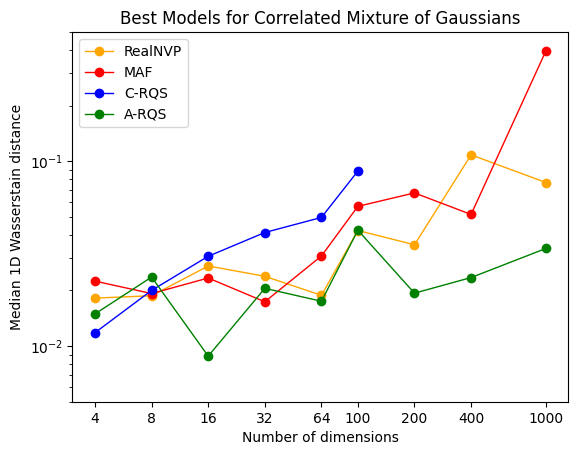

In [63]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_corr_WD[:,0],RealNVPN_corr_WD[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_corr_WD[:,0],MAFN_corr_WD[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_corr_WD[:,0],CsplineN_corr_WD[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_corr_WD[:,0],MsplineN_corr_WD[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
if labels:
    for i in MsplineN_corr_WD:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_WD:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_WD:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_WD:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('Median 1D Wasserstain distance')
plt.ylim(0.005,0.5)
plt.title("Best Models for Correlated Mixture of Gaussians")
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100,200,400,1000], ['4','8','16','32','64','100','200','400','1000'])
plt.savefig(paper_fig_dir + 'Best_WD_median_corr.pdf')
plt.show()
plt.close()

In [53]:
#jtplot.reset()
#linewidth = 0.3
#point_label_size = 8
#point_marker = '.' #'go--'
#plt.plot(MsplineN_corr_WD[:,0],MsplineN_corr_WD[:,1],point_marker, color='green', label='Mspline (corr)', linestyle="-", linewidth=linewidth)
#for i in MsplineN_corr_WD:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
#plt.plot(MsplineN_uncorr_WD[:,0],MsplineN_uncorr_WD[:,1],point_marker, color='green', label='Mspline (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in MsplineN_uncorr_WD:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
#plt.plot(CsplineN_corr_WD[:,0],CsplineN_corr_WD[:,1],point_marker, color='blue', label='Cspline (corr)', linestyle="-", linewidth=linewidth)
#for i in CsplineN_corr_WD:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='blue')
#plt.plot(CsplineN_uncorr_WD[:,0],CsplineN_uncorr_WD[:,1],point_marker, color='blue', label='Cspline (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in CsplineN_uncorr_WD:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='blue')
#plt.plot(MAFN_corr_WD[:,0],MAFN_corr_WD[:,1],point_marker, color='red', label='MAF (corr)', linestyle="-", linewidth=linewidth)
#for i in MAFN_corr_WD:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
#plt.plot(MAFN_uncorr_WD[:,0],MAFN_uncorr_WD[:,1],point_marker, color='red', label='MAF (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in MAFN_uncorr_WD:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
#plt.plot(RealNVPN_corr_WD[:,0],RealNVPN_corr_WD[:,1],point_marker, color='orange', label='RealNVP (corr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in RealNVPN_corr_WD:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
#plt.plot(RealNVPN_uncorr_WD[:,0],RealNVPN_uncorr_WD[:,1],point_marker, color='orange', label='RealNVP (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in RealNVPN_uncorr_WD:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
#plt.xscale('log')
#plt.yscale('log')
#plt.xlabel('Number of dimensions')
#plt.ylabel('W-distance')
#plt.ylim(0,5)
#plt.title("Corr. MoG: median Wasserstein distance for best models")
##lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
#plt.legend()
#plt.savefig(paper_fig_dir + 'Best_WD_median_corr.pdf')
#plt.show()
#plt.close()

### KS

In [64]:
MsplineN_corr_KS = extract_lines(df_bests_corr,"MsplineN","corr","ks_test_median")
MsplineN_uncorr_KS = extract_lines(df_bests_corr,"MsplineN","uncorr","ks_test_median")
CsplineN_corr_KS = extract_lines(df_bests_corr,"CsplineN","corr","ks_test_median")
CsplineN_uncorr_KS = extract_lines(df_bests_corr,"CsplineN","uncorr","ks_test_median")
MAFN_corr_KS = extract_lines(df_bests_corr,"MAFN","corr","ks_test_median")
MAFN_uncorr_KS = extract_lines(df_bests_corr,"MAFN","uncorr","ks_test_median")
RealNVPN_corr_KS = extract_lines(df_bests_corr,"RealNVPN","corr","ks_test_median")
RealNVPN_uncorr_KS = extract_lines(df_bests_corr,"RealNVPN","uncorr","ks_test_median")

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to

In [55]:
#KS_threshold=0.000000001
#MsplineN_corr_KS = np.array([x for x in MsplineN_corr_KS if x[1]>KS_threshold])
#MsplineN_uncorr_KS = np.array([x for x in MsplineN_uncorr_KS if x[1]>KS_threshold])
#CsplineN_corr_KS = np.array([x for x in CsplineN_corr_KS if x[1]>KS_threshold])
#CsplineN_uncorr_KS = np.array([x for x in CsplineN_uncorr_KS if x[1]>KS_threshold])
#MAFN_corr_KS = np.array([x for x in MAFN_corr_KS if x[1]>KS_threshold])
#MAFN_uncorr_KS = np.array([x for x in MAFN_uncorr_KS if x[1]>KS_threshold])
#RealNVPN_corr_KS = np.array([x for x in RealNVPN_corr_KS if x[1]>KS_threshold])
#RealNVPN_uncorr_KS = np.array([x for x in RealNVPN_uncorr_KS if x[1]>KS_threshold])

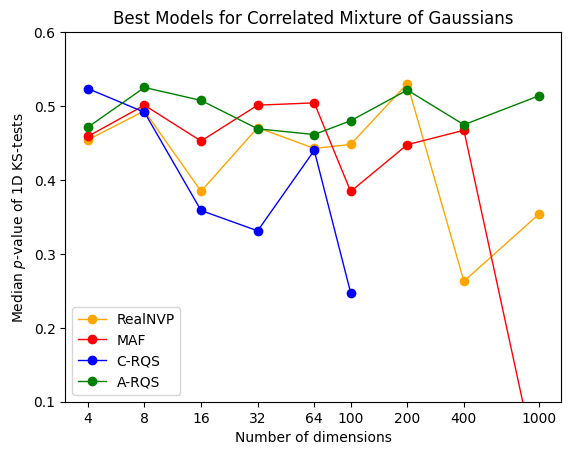

In [66]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_corr_KS[:,0],RealNVPN_corr_KS[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_corr_KS[:,0],MAFN_corr_KS[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_corr_KS[:,0],CsplineN_corr_KS[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_corr_KS[:,0],MsplineN_corr_KS[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
if labels:
    for i in MsplineN_corr_KS:
        plt.text(i[0]*0.85,i[1]*1, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_KS:
        plt.text(i[0]*1.05,i[1]*0.98, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_KS:
        plt.text(i[0]*1.05,i[1]*1.01, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_KS:
        plt.text(i[0]*0.85,i[1]*0.98, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('Median $p$-value of 1D KS-tests')
plt.ylim(0.1,0.6)
plt.title("Best Models for Correlated Mixture of Gaussians")
#lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100,200,400,1000], ['4','8','16','32','64','100','200','400','1000'])
plt.savefig(paper_fig_dir + 'Best_KS_median_corr.pdf')
plt.show()
plt.close()

In [57]:
#jtplot.reset()
#linewidth = 0.3
#point_label_size = 8
#point_marker = '.' #'go--'
#plt.plot(MsplineN_corr_KS[:,0],MsplineN_corr_KS[:,1],point_marker, color='green', label='Mspline (corr)', linestyle="solid", linewidth=linewidth)
#for i in MsplineN_corr_KS:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
#plt.plot(MsplineN_uncorr_KS[:,0],MsplineN_uncorr_KS[:,1],point_marker, color='green', label='Mspline (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in MsplineN_uncorr_KS:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
#plt.plot(CsplineN_corr_KS[:,0],CsplineN_corr_KS[:,1],point_marker, color='blue', label='Cspline (corr)', linestyle="solid", linewidth=linewidth)
#for i in CsplineN_corr_KS:
#    plt.text(i[0]*1.05,i[1]*1.03, str(int(i[2])), fontsize=point_label_size, color='blue')
#plt.plot(CsplineN_uncorr_KS[:,0],CsplineN_uncorr_KS[:,1],point_marker, color='blue', label='Cspline (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in CsplineN_uncorr_KS:
#    plt.text(i[0]*1.05,i[1]*0.95, str(int(i[2])), fontsize=point_label_size, color='blue')
#plt.plot(MAFN_corr_KS[:,0],MAFN_corr_KS[:,1],point_marker, color='red', label='MAF (corr)', linestyle="solid", linewidth=linewidth)
#for i in MAFN_corr_KS:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
#plt.plot(MAFN_uncorr_KS[:,0],MAFN_uncorr_KS[:,1],point_marker, color='red', label='MAF (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in MAFN_uncorr_KS:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
#plt.plot(RealNVPN_corr_KS[:,0],RealNVPN_corr_KS[:,1],point_marker, color='orange', label='RealNVP (corr)', linestyle="solid", linewidth=linewidth)
#for i in RealNVPN_corr_KS:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
#plt.plot(RealNVPN_uncorr_KS[:,0],RealNVPN_uncorr_KS[:,1],point_marker, color='orange', label='RealNVP (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in RealNVPN_uncorr_KS:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
#plt.xscale('log')
##plt.yscale('log')
#plt.ylim(0.2,0.55)
#plt.title("Corr. MoG: median p-value of KS-test for best models")
##lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
#plt.legend()
#plt.savefig(paper_fig_dir + 'Best_KS_median_corr.pdf')
#plt.show()
#plt.close()

### Frobenius-norm

In [67]:
MsplineN_corr_FN = extract_lines(df_bests_corr,"MsplineN","corr","frob_norm")
MsplineN_uncorr_FN = extract_lines(df_bests_corr,"MsplineN","uncorr","frob_norm")
CsplineN_corr_FN = extract_lines(df_bests_corr,"CsplineN","corr","frob_norm")
CsplineN_uncorr_FN = extract_lines(df_bests_corr,"CsplineN","uncorr","frob_norm")
MAFN_corr_FN = extract_lines(df_bests_corr,"MAFN","corr","frob_norm")
MAFN_uncorr_FN = extract_lines(df_bests_corr,"MAFN","uncorr","frob_norm")
RealNVPN_corr_FN = extract_lines(df_bests_corr,"RealNVPN","corr","frob_norm")
RealNVPN_uncorr_FN = extract_lines(df_bests_corr,"RealNVPN","uncorr","frob_norm")

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to

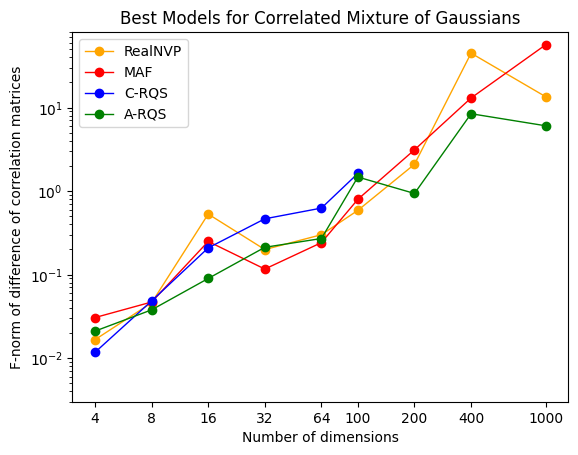

In [68]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_corr_FN[:,0],RealNVPN_corr_FN[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_corr_FN[:,0],MAFN_corr_FN[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_corr_FN[:,0],CsplineN_corr_FN[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_corr_FN[:,0],MsplineN_corr_FN[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
if labels:
    for i in MsplineN_corr_FN:
        plt.text(i[0]*0.85,i[1]*1, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_FN:
        plt.text(i[0]*1.05,i[1]*1.03, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_FN:
        plt.text(i[0]*1.05,i[1]*0.8, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_FN:
        plt.text(i[0]*0.85,i[1]*0.75, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('F-norm of difference of correlation matrices')
plt.ylim(0.003,80)
plt.title("Best Models for Correlated Mixture of Gaussians")
#lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100,200,400,1000], ['4','8','16','32','64','100','200','400','1000'])
plt.savefig(paper_fig_dir + 'Best_FN_corr.pdf')
plt.show()
plt.close()

### Training time

In [71]:
MsplineN_corr_time = extract_lines(df_bests_corr,"MsplineN","corr","time").astype(np.float)
MsplineN_uncorr_time = extract_lines(df_bests_corr,"MsplineN","uncorr","time").astype(np.float)
CsplineN_corr_time = extract_lines(df_bests_corr,"CsplineN","corr","time").astype(np.float)
CsplineN_uncorr_time = extract_lines(df_bests_corr,"CsplineN","uncorr","time").astype(np.float)
MAFN_corr_time = extract_lines(df_bests_corr,"MAFN","corr","time").astype(np.float)
MAFN_uncorr_time = extract_lines(df_bests_corr,"MAFN","uncorr","time").astype(np.float)
RealNVPN_corr_time = extract_lines(df_bests_corr,"RealNVPN","corr","time").astype(np.float)
RealNVPN_uncorr_time = extract_lines(df_bests_corr,"RealNVPN","uncorr","time").astype(np.float)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\rtorre\AppData\Local\Temp\ipykernel_28392\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to

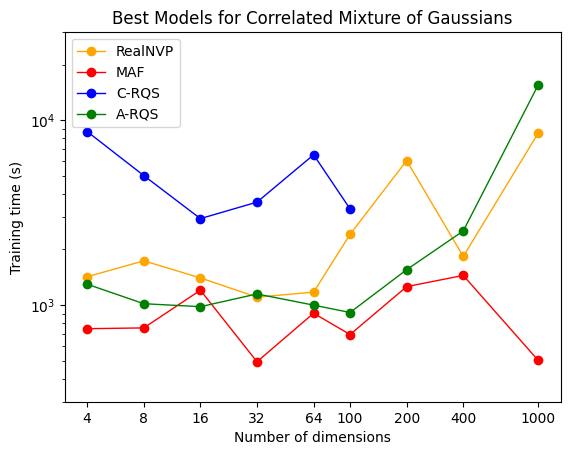

In [72]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_corr_time[:,0],RealNVPN_corr_time[:,1],point_marker, color='orange', label='RealNVP', linestyle="solid", linewidth=linewidth)
plt.plot(MAFN_corr_time[:,0],MAFN_corr_time[:,1],point_marker, color='red', label='MAF', linestyle="solid", linewidth=linewidth)
plt.plot(CsplineN_corr_time[:,0],CsplineN_corr_time[:,1],point_marker, color='blue', label='C-RQS', linestyle="solid", linewidth=linewidth)
plt.plot(MsplineN_corr_time[:,0],MsplineN_corr_time[:,1],point_marker, color='green', label='A-RQS', linestyle="solid", linewidth=linewidth)
if labels:
    for i in MsplineN_corr_time:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_time:
        plt.text(i[0]*1.05,i[1]*1.03, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_time:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_time:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('Training time (s)')
plt.ylim(300,30000)
plt.title("Best Models for Correlated Mixture of Gaussians")
#lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100,200,400,1000], ['4','8','16','32','64','100','200','400','1000'])
plt.savefig(paper_fig_dir + 'Best_training_time_corr.pdf')
plt.show()
plt.close()

## Tables

In [70]:
tmp=df_bests_corr[8]
print(tmp["ndims"].iloc[0])
tmp=tmp[tmp["correlation"]=="corr"]
tmp=tmp[["hidden_layers","nbijectors","bijector","spline_knots","batch_size","Wasserstein_median", "ks_test_median", "frob_norm","epochs_output","time"]]
tmp["Wasserstein_median"]=tmp["Wasserstein_median"].apply(lambda x: "{:.2e}".format(float(x)))
tmp["ks_test_median"]=tmp["ks_test_median"].apply(lambda x: "{:.2e}".format(float(x)))
tmp["frob_norm"]=tmp["frob_norm"].apply(lambda x: "{:.2e}".format(float(x)))
tmp["time"]=tmp["time"].apply(lambda x: int(float(x)))
string=tmp.to_latex()
print(string)

1000
\begin{tabular}{llrlrrlllrr}
\toprule
{} & hidden\_layers &  nbijectors &  bijector &  spline\_knots &  batch\_size & Wasserstein\_median & ks\_test\_median & frob\_norm &  epochs\_output &   time \\
\midrule
0 &   128-128-128 &           2 &  MsplineN &             8 &         512 &           3.38e-02 &       5.14e-01 &  6.04e+00 &           1000 &  15493 \\
3 &   128-128-128 &          10 &  RealNVPN &             8 &         256 &           7.67e-02 &       3.54e-01 &  1.34e+01 &            592 &   8504 \\
6 &   128-128-128 &           5 &      MAFN &             8 &         512 &           3.96e-01 &       3.02e-05 &  5.67e+01 &            133 &    502 \\
\bottomrule
\end{tabular}



C:\Users\rtorre\AppData\Local\Temp\ipykernel_31672\937436917.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  string=tmp.to_latex()
